<a href="https://colab.research.google.com/github/nicoussj/EDA_FundamentosML_NicolasChiguay/blob/main/CorrecionPrueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero se importan las librerias necesarias

In [32]:
import numpy as np # Programacion vectorial
import matplotlib.pyplot as plt # Visualizacion
import pandas as pd # Estructura y manipulacion de datos
import seaborn as sns # Visualizacion avanzada
import scipy.stats as st #Necesitamos importar calcular el intervalo de confianza

Conecta con el contenido en el drive, ademas se importa el dataset "data.csv" descargado de kaggle

In [4]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
data = pd.read_csv(name, sep=",", encoding='latin-1')

Saving data.csv to data (1).csv


In [48]:
data.head() #Con el metodo podemos ver las primeras filas de un dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [49]:
data.tail() #Con el metodo podemos ver las ultimas filas de un dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [50]:
data.sample() #Con el metodo podemos explorar una fila al azar de un dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
166348,550913,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-04-21 13:22:00,8.5,17631.0,United Kingdom


In [51]:
data.columns #Con este metodo podemos ver todos los nombres de las columnas

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [52]:
# Convertir la columna InvoiceDate a tipo datetime
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], format="%m/%d/%Y %H:%M")

In [53]:
# Resumen estadIstico de variables numericas
summary_stats = data[["Quantity", "UnitPrice"]].describe()

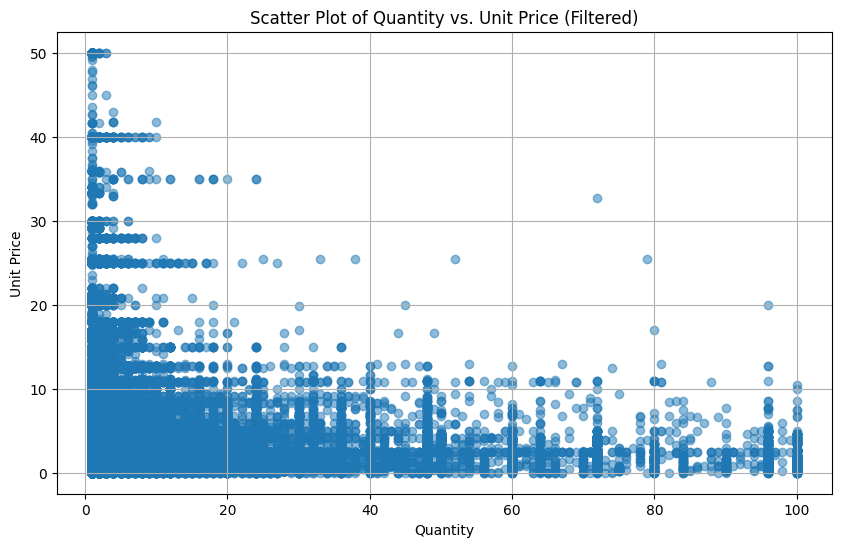

In [54]:
# Grafico de Distribución de cantidad y precio unitario
filtered_data = data[(data['Quantity'] >= 1) & (data['Quantity'] <= 100) & (data['UnitPrice'] >= 0) & (data['UnitPrice'] <= 50)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Quantity'], filtered_data['UnitPrice'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Scatter Plot of Quantity vs. Unit Price (Filtered)')
plt.grid(True)
plt.show()

Variables Identificadas:

Categoricas: InvoiceNo, StockCode, Description, CustomerID, Country.

Numericas: Quantity, UnitPrice.

Medidas Estadisticas:

Cantidad comprada (Quantity):

Media: 9.55

Minimo: -80995 (posible error o devolución)

Maximo: 80995

Precio unitario (UnitPrice):

Media: 4.61

Minimo: -11062.06 (posible error)

Maximo: 38970

Distribución de datos:

La cantidad comprada tiene valores extremos negativos, lo que sugiere devoluciones o errores en los datos.

El precio unitario también presenta valores negativos y un rango amplio.

In [55]:
# Primero, calculamos la media muestral y la desviacion estandar muestral
mean_price = data["UnitPrice"].mean()
std_price = data["UnitPrice"].std()
n = len(data["UnitPrice"])  # Tamaño de la muestra

In [56]:
#Calcular el intervalo de confianza del 95%
confidence_level = 0.95
degrees_freedom = n - 1
t_critical = st.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_critical * (std_price / np.sqrt(n))
confidence_interval = (mean_price - margin_of_error, mean_price + margin_of_error)

print(f"Intervalo de confianza del {confidence_level*100:.0f}% para el precio unitario medio: {confidence_interval}")

Intervalo de confianza del 95% para el precio unitario medio: (4.35349273428204, 4.868734517894986)


Interpretacion: Con un 95% de confianza, podemos decir que el precio unitario medio real de todos los productos se encuentra entre los siguientes valores:(4.35349273428204, 4.868734517894986)


Top 10 productos más vendidos:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


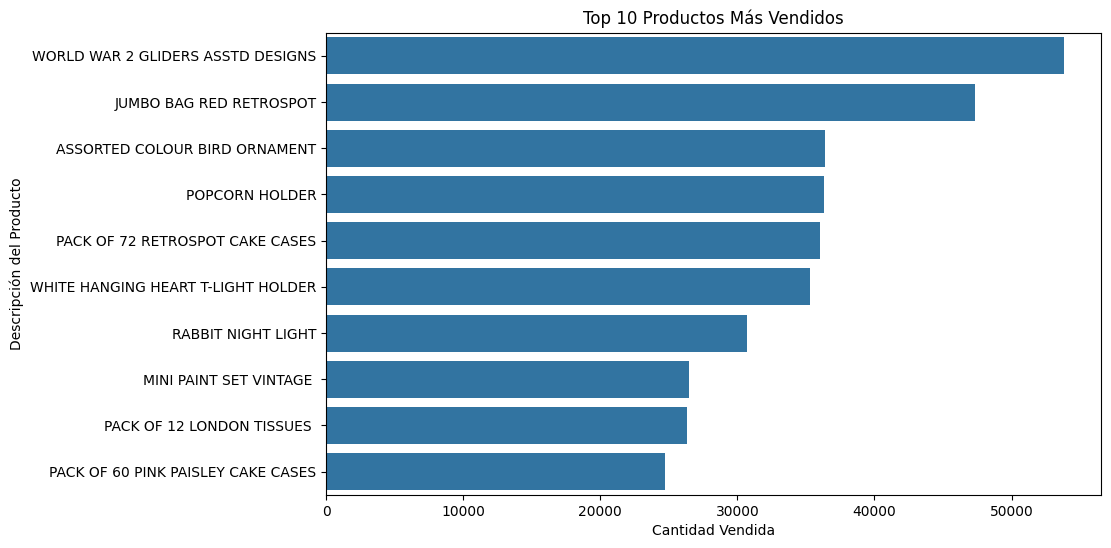

In [57]:
# Top 10 productos más vendidos
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 productos más vendidos:\n", top_products)

# Visualización de los top 10 productos
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Descripción del Producto')
plt.show()


Top 10 países con más ventas:
 Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


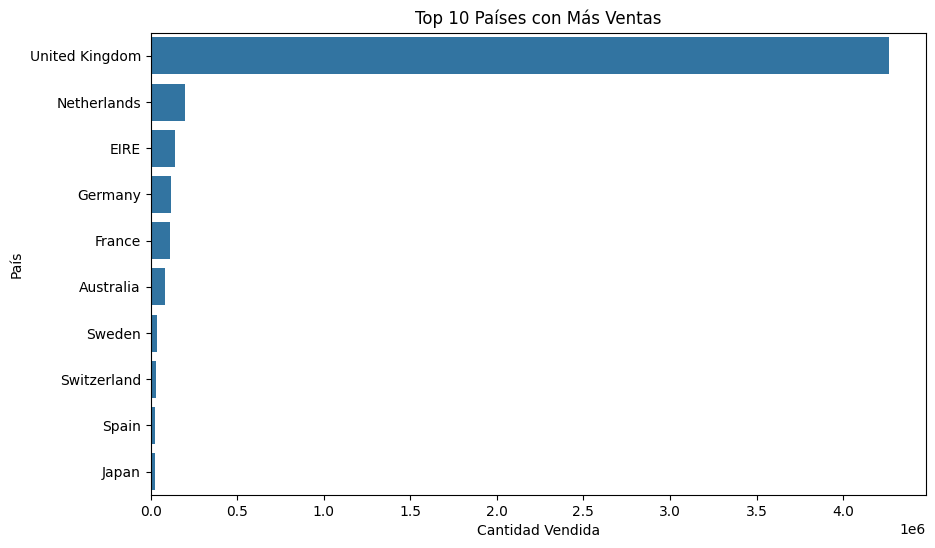

In [58]:
# Top 10 países con más ventas
top_countries = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 países con más ventas:\n", top_countries)

# Visualización de los top 10 países
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Países con Más Ventas')
plt.xlabel('Cantidad Vendida')
plt.ylabel('País')
plt.show()

In [59]:
# Tabla de frecuencia de los países
country_counts = data['Country'].value_counts()
print("\nTabla de frecuencia de países:\n", country_counts)


Tabla de frecuencia de países:
 Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          6

In [60]:

total_quantity = data['Quantity'].sum()
country_probabilities = data.groupby('Country')['Quantity'].sum() / total_quantity

print("\nProbabilidad de venta por país:\n", country_probabilities)


Probabilidad de venta por país:
 Country
Australia               0.016160
Austria                 0.000932
Bahrain                 0.000050
Belgium                 0.004473
Brazil                  0.000069
Canada                  0.000534
Channel Islands         0.001831
Cyprus                  0.001220
Czech Republic          0.000114
Denmark                 0.001582
EIRE                    0.027555
European Community      0.000096
Finland                 0.002060
France                  0.021343
Germany                 0.022689
Greece                  0.000301
Hong Kong               0.000921
Iceland                 0.000475
Israel                  0.000841
Italy                   0.001545
Japan                   0.004872
Lebanon                 0.000075
Lithuania               0.000126
Malta                   0.000182
Netherlands             0.038661
Norway                  0.003718
Poland                  0.000706
Portugal                0.003126
RSA                     0.000068
S

In [61]:
returns = data[data['Quantity'] < 0]
probability_return = len(returns) / len(data)
print(f"\nProbabilidad estimada de devolución: {probability_return:.4f}")


Probabilidad estimada de devolución: 0.0196


-La probabilidad de venta en un país y la probabilidad de devolución NO son necesariamente independientes.

-Un país con mayores ventas podría tener una mayor cantidad de devoluciones simplemente por volumen.